In [1]:
import os
import zarr
from config import DATA_DIR, TARGET_DIR
import numpy as np

def process_experiment_runs(base_dir):
    # Dictionnaire pour stocker les r√©sultats par TS
    data_results = {}

    # Parcourir tous les sous-dossiers dans ExperimentRuns
    for ts_folder in os.listdir(base_dir):
        ts_path = os.path.join(base_dir, ts_folder)

        # V√©rifier si le dossier contient un fichier Zarr
        zarr_path = os.path.join(ts_path, "VoxelSpacing10.000/denoised.zarr")
        if os.path.exists(zarr_path):
            print(f"Traitement de {ts_folder}...")

            # Charger le groupe Zarr
            zgroup = zarr.open_group(zarr_path, mode='r')
            
            # Visualiser l'arborescence
            print(f"Arborescence pour {ts_folder}:")
            print(zgroup.tree())
            
            # Dictionnaire pour stocker les donn√©es de ce TS
            ts_data = {}

            # Parcourir les sous-groupes (0, 1, 2, ...)
            for subgroup_key in zgroup.keys():
                subgroup = zgroup[subgroup_key]

                # Extraire les m√©tadonn√©es et les donn√©es
                ts_data[subgroup_key] = {
                    "attrs": dict(subgroup.attrs),  # Convertir les m√©tadonn√©es en dictionnaire
                    "info": subgroup.info,
                    "data": subgroup[:],  # Charger les donn√©es compl√®tes
                }

            # Ajouter les donn√©es au dictionnaire global
            data_results[ts_folder] = ts_data

    return data_results




# Traiter les tomogrammes
all_data = process_experiment_runs(DATA_DIR)

# Sauvegarder les r√©sultats ou continuer l'analyse
print("Traitement termin√©. R√©sum√© des donn√©es extraites :")
for ts_name, ts_content in all_data.items():
    print(f"- {ts_name}: {len(ts_content)} sous-groupes trait√©s.")


Traitement de TS_5_4...
Arborescence pour TS_5_4:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_69_2...
Arborescence pour TS_69_2:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_6_4...
Arborescence pour TS_6_4:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_6_6...
Arborescence pour TS_6_6:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_73_6...
Arborescence pour TS_73_6:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_86_3...
Arborescence pour TS_86_3:
/
 ‚îú‚îÄ‚îÄ 0 (184, 630, 630) float32
 ‚îú‚îÄ‚îÄ 1 (92, 315, 315) float32
 ‚îî‚îÄ‚îÄ 2 (46, 158, 158) float32
Traitement de TS_99_9...
Arb

In [2]:
all_data.keys()

dict_keys(['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9'])

In [3]:
all_data['TS_5_4'].keys()

dict_keys(['0', '1', '2'])

In [4]:
all_data['TS_5_4']['0']['data']

array([[[-1.0589503e-08,  1.5891337e-06,  8.6985551e-07, ...,
          1.2546960e-06,  2.7620436e-07, -9.6554413e-07],
        [-4.9929668e-07,  2.7837150e-06,  3.0947467e-06, ...,
          2.8480628e-07, -8.9094044e-08, -1.4401762e-06],
        [-1.0891541e-06,  1.5427659e-06,  1.4145429e-06, ...,
          1.8715558e-07, -5.1522932e-07, -1.3863324e-06],
        ...,
        [-6.9335545e-07,  3.5703101e-07,  8.0947825e-07, ...,
         -1.4218481e-06, -9.1161525e-08, -1.2515941e-06],
        [-4.2106151e-07,  2.2317974e-07,  8.7088415e-07, ...,
         -2.5142091e-07,  4.4749459e-07,  3.5609071e-07],
        [-2.6293966e-07, -2.7313038e-07, -5.7560578e-07, ...,
          7.9891106e-07,  4.1823807e-07,  1.9056137e-07]],

       [[-8.9148364e-07,  1.9433514e-06,  4.5870165e-06, ...,
          2.9067949e-06,  8.9173477e-07, -1.3247987e-06],
        [-1.5419438e-06,  3.6550177e-06,  8.8251591e-06, ...,
         -5.1537575e-07, -6.8805934e-07, -1.8712533e-06],
        [-2.2441336e-06, 

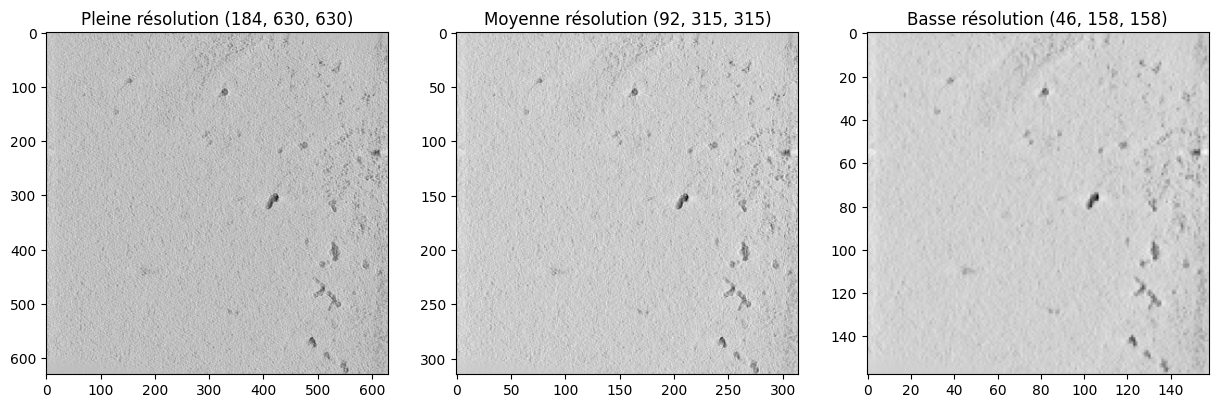

In [5]:
import matplotlib.pyplot as plt

# Afficher une coupe z=0 pour chaque r√©solution
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(all_data['TS_5_4']['0']['data'][0,:,:], cmap='gray')
axs[0].set_title("Pleine r√©solution (184, 630, 630)")
axs[1].imshow(all_data['TS_5_4']['1']['data'][0,:,:], cmap='gray')
axs[1].set_title("Moyenne r√©solution (92, 315, 315)")
axs[2].imshow(all_data['TS_5_4']['2']['data'][0,:,:], cmap='gray')
axs[2].set_title("Basse r√©solution (46, 158, 158)")
plt.show()

In [6]:
import json

def load_targets(base_path):
    # Dictionnaire pour stocker les informations de chaque tomogramme
    target_data = {}

    # Parcourir tous les dossiers dans le chemin de base (num√©ros de tomogrammes)
    for tomogram_folder in os.listdir(base_path):
        tomogram_path = os.path.join(base_path, tomogram_folder)

        # V√©rifier si un dossier "Picks" existe dans le tomogramme
        picks_path = os.path.join(tomogram_path, "Picks")
        if not os.path.exists(picks_path):
            print(f"Pas de dossier 'Picks' dans {tomogram_folder}")
            continue

        # Parcourir tous les fichiers JSON dans le dossier "Picks"
        for json_file in os.listdir(picks_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(picks_path, json_file)

                # Charger le fichier JSON
                with open(json_path, 'r') as f:
                    data = json.load(f)

                # Extraire le nom de la mol√©cule et la localisation des points
                molecule_name = data.get("pickable_object_name", "inconnu")
                points = data.get("points", [])

                # Ajouter les informations au dictionnaire
                if tomogram_folder not in target_data:
                    target_data[tomogram_folder] = {}

                # Sauvegarder les donn√©es pour chaque mol√©cule dans le tomogramme
                target_data[tomogram_folder][molecule_name] = points

    return target_data

# Charger les targets
all_targets = load_targets(TARGET_DIR)

# Affichage des donn√©es charg√©es
print("R√©sum√© des donn√©es de targets :")
for tomogram, molecules in all_targets.items():
    print(f"- {tomogram}: {len(molecules)} mol√©cules trouv√©es")
    for molecule, points in molecules.items():
        print(f"  * {molecule}: {len(points)} points")


R√©sum√© des donn√©es de targets :
- TS_5_4: 6 mol√©cules trouv√©es
  * apo-ferritin: 46 points
  * beta-amylase: 10 points
  * beta-galactosidase: 12 points
  * ribosome: 31 points
  * thyroglobulin: 30 points
  * virus-like-particle: 11 points
- TS_69_2: 6 mol√©cules trouv√©es
  * apo-ferritin: 35 points
  * beta-amylase: 12 points
  * beta-galactosidase: 16 points
  * ribosome: 37 points
  * thyroglobulin: 34 points
  * virus-like-particle: 9 points
- TS_6_4: 6 mol√©cules trouv√©es
  * apo-ferritin: 58 points
  * beta-amylase: 9 points
  * beta-galactosidase: 12 points
  * ribosome: 74 points
  * thyroglobulin: 30 points
  * virus-like-particle: 10 points
- TS_6_6: 6 mol√©cules trouv√©es
  * apo-ferritin: 41 points
  * beta-amylase: 14 points
  * beta-galactosidase: 11 points
  * ribosome: 23 points
  * thyroglobulin: 35 points
  * virus-like-particle: 19 points
- TS_73_6: 6 mol√©cules trouv√©es
  * apo-ferritin: 95 points
  * beta-amylase: 12 points
  * beta-galactosidase: 14 point

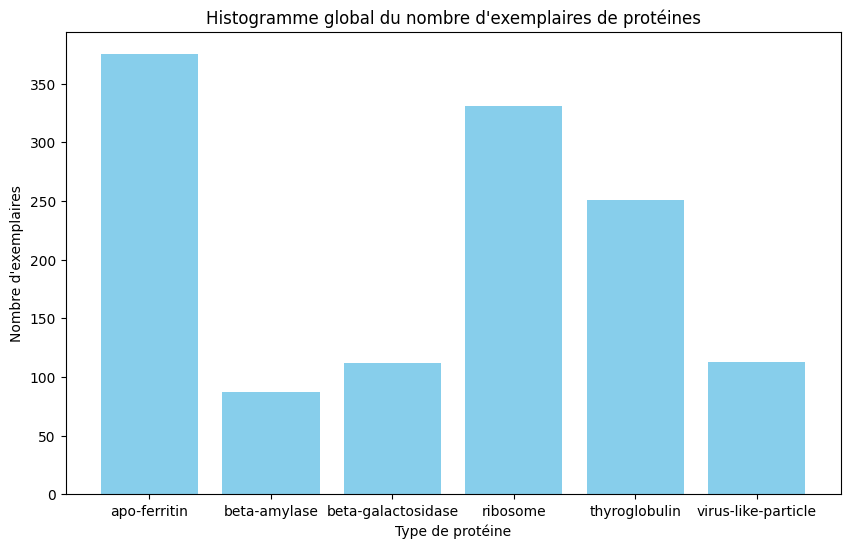

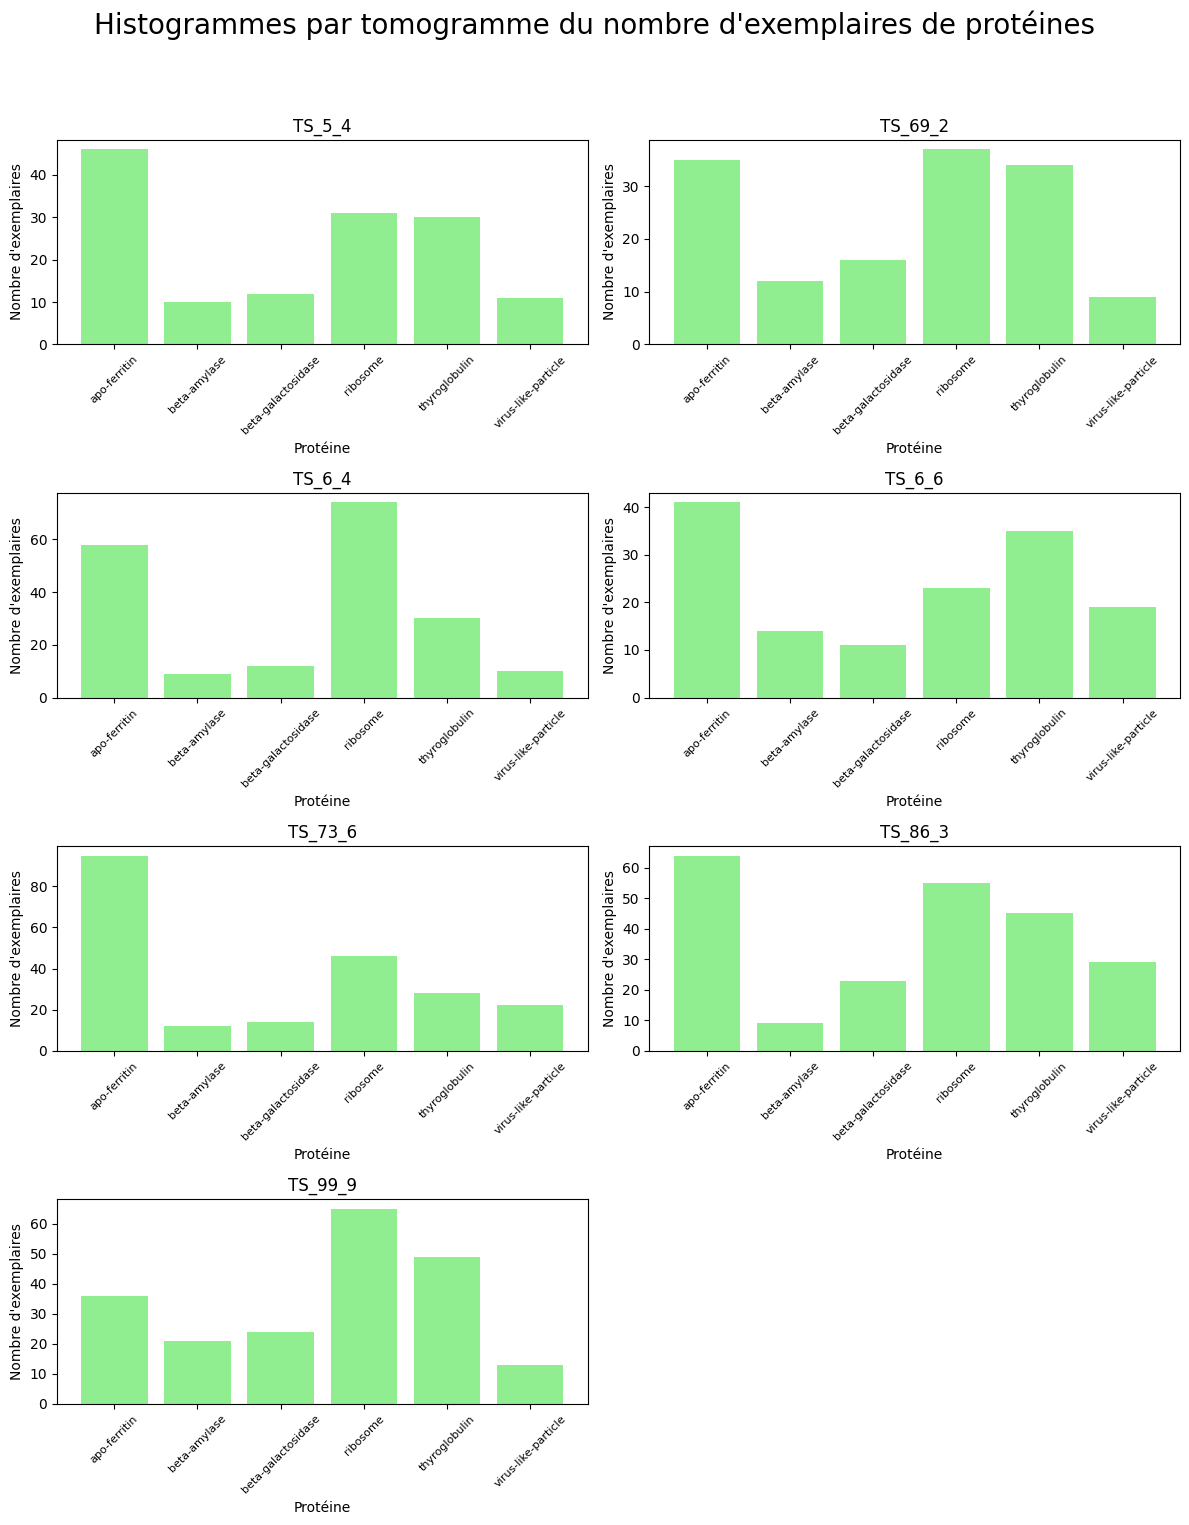

In [7]:
import matplotlib.pyplot as plt
import math

# --- Histogramme global ---
global_counts = {}
for tomogram, molecules in all_targets.items():
    for molecule, points in molecules.items():
        global_counts[molecule] = global_counts.get(molecule, 0) + len(points)

plt.figure(figsize=(10,6))
plt.bar(global_counts.keys(), global_counts.values(), color='skyblue')
plt.xlabel("Type de prot√©ine")
plt.ylabel("Nombre d'exemplaires")
plt.title("Histogramme global du nombre d'exemplaires de prot√©ines")
plt.show()

# --- Histogrammes d√©taill√©s par tomogramme ---
# D√©terminer le nombre de tomogrammes √† afficher
num_tomograms = len(all_targets)
# Choisir une disposition en grille adapt√©e (par exemple 2 colonnes si plus de 2 tomogrammes)
cols = 2
rows = math.ceil(num_tomograms / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4), squeeze=False)

# Parcourir les tomogrammes et tracer l'histogramme pour chacun
tomogram_names = list(all_targets.keys())
for idx, tomogram in enumerate(tomogram_names):
    row = idx // cols
    col = idx % cols
    ax = axes[row][col]
    
    # Calculer le nombre d'exemplaires pour chaque prot√©ine dans ce tomogramme
    counts = {molecule: len(points) for molecule, points in all_targets[tomogram].items()}
    
    ax.bar(counts.keys(), counts.values(), color='lightgreen')
    ax.set_title(tomogram)
    ax.set_xlabel("Prot√©ine")
    ax.set_ylabel("Nombre d'exemplaires")
    # Rotation des √©tiquettes pour une meilleure lisibilit√©
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)

# Supprimer les sous-graphes vides s'il y en a
total_plots = rows * cols
if num_tomograms < total_plots:
    for idx in range(num_tomograms, total_plots):
        row = idx // cols
        col = idx % cols
        fig.delaxes(axes[row][col])

plt.suptitle("Histogrammes par tomogramme du nombre d'exemplaires de prot√©ines", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [8]:
import os
import zarr
import json

def prepare_dataset(image_path, target_path):
    """
    Pr√©pare un dataset associant les donn√©es d'images aux targets (prot√©ines et positions).
    
    Args:
        image_path (str): Chemin vers le dossier contenant les images Zarr.
        target_path (str): Chemin vers le dossier contenant les targets (fichiers JSON).

    Returns:
        list: Liste de dictionnaires, o√π chaque √©l√©ment contient les donn√©es d'un tomogramme :
            - "name": Nom du tomogramme.
            - "images": Liste des r√©solutions (volumes 3D).
            - "targets": Dictionnaire {type_mol√©cule: [positions (x, y, z)]}.
    """
    dataset = []

    # Parcourir les tomogrammes dans le dossier des images
    for tomogram_name in os.listdir(image_path):
        tomogram_image_path = os.path.join(image_path, tomogram_name, "VoxelSpacing10.000/denoised.zarr")
        tomogram_target_path = os.path.join(target_path, tomogram_name, "Picks")

        # V√©rifier que les donn√©es Zarr et les targets existent
        if not os.path.exists(tomogram_image_path):
            print(f"Images non trouv√©es pour {tomogram_name}, ignor√©.")
            continue

        if not os.path.exists(tomogram_target_path):
            print(f"Targets non trouv√©s pour {tomogram_name}, ignor√©.")
            continue

        # Charger les images (volumes 3D √† plusieurs r√©solutions)
        zgroup = zarr.open_group(tomogram_image_path, mode='r')
        sorted_keys = sorted(zgroup.keys(), key=lambda k: np.prod(zgroup[k].shape), reverse=True)
        images = [zgroup[key][:] for key in sorted_keys]

        # Charger les targets (localisations des particules)
        targets = {}
        for json_file in os.listdir(tomogram_target_path):
            if json_file.endswith(".json"):
                json_path = os.path.join(tomogram_target_path, json_file)
                with open(json_path, 'r') as f:
                    data = json.load(f)
                    molecule_name = data.get("pickable_object_name", "unknown")
                    points = [
                        [point["location"]["x"], point["location"]["y"], point["location"]["z"]]
                        for point in data["points"]
                    ]
                    if molecule_name not in targets:
                        targets[molecule_name] = []
                    targets[molecule_name].extend(points)

        # Ajouter les donn√©es du tomogramme au dataset
        dataset.append({
            "name": tomogram_name,
            "images": images,  # Liste des r√©solutions
            "targets": targets  # Localisations des particules par type
        })

    return dataset

# print tomogram shapes for each resolution in the order of the dataset
def print_shapes(dataset):
    for tomogram in dataset:
        print(f"Tomogramme {tomogram['name']}:")
        for i, image in enumerate(tomogram['images']):
            print(f"  - R√©solution {i}: {image.shape}")




In [9]:
# Chemins des donn√©es

# Pr√©parer le dataset
dataset = prepare_dataset(DATA_DIR, TARGET_DIR)

print_shapes(dataset)

# Exemple : Afficher les donn√©es du premier tomogramme
print(f"Nom du tomogramme : {dataset[0]['name']}")
print(f"Forme de l'image (r√©solution 1) : {dataset[0]['images'][0].shape}")
print(f"Targets : {dataset[0]['targets']}")

Tomogramme TS_5_4:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Tomogramme TS_69_2:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Tomogramme TS_6_4:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Tomogramme TS_6_6:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Tomogramme TS_73_6:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Tomogramme TS_86_3:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Tomogramme TS_99_9:
  - R√©solution 0: (184, 630, 630)
  - R√©solution 1: (92, 315, 315)
  - R√©solution 2: (46, 158, 158)
Nom du tomogramme : TS_5_4
Forme de l'image (r√©solution 1) : (184, 630, 630)
Targets : {'apo-ferritin': [[468.514, 5915.906, 604.167], [5674.

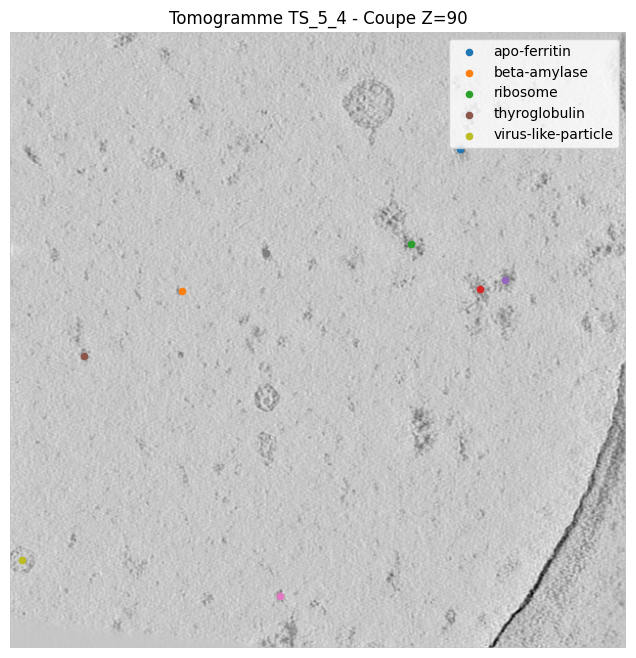

In [10]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les dictionnaires all_data et all_targets ont √©t√© g√©n√©r√©s par vos fonctions process_experiment_runs et load_targets.
# Par exemple :
#   all_data = process_experiment_runs(DATA_DIR)
#   all_targets = load_targets(TARGET_DIR)

voxel_size = 10  # M√™me valeur utilis√©e lors du chargement et de l'analyse

# Choisir un tomogramme et une r√©solution (ici, 'TS_5_4' et le groupe '0' pour la pleine r√©solution)
tomogram_folder = 'TS_5_4'
resolution_group = '0'
slice_index = 90  # Coupe √† afficher sur l'axe Z

# Charger la coupe du tomogramme
tomogram_volume = all_data[tomogram_folder][resolution_group]['data']
image_slice = tomogram_volume[slice_index, :, :]

plt.figure(figsize=(8, 8))
plt.imshow(image_slice, cmap='gray')
plt.title(f"Tomogramme {tomogram_folder} - Coupe Z={slice_index}")

# V√©rifier si des cibles (targets) sont pr√©sentes pour ce tomogramme
if tomogram_folder in all_targets:
    molecules = all_targets[tomogram_folder]
    
    # Pour √©viter les doublons dans la l√©gende
    legend_entries = {}
    
    for molecule, points in molecules.items():
        for point in points:
            # Extraction des coordonn√©es depuis la cl√© "location"
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            z = point["location"]["z"] / voxel_size  # Coordonn√©e Z en voxels
            
            # N'afficher que les points proches de la coupe s√©lectionn√©e
            if abs(z - slice_index) < 3:  # Seuil ajustable selon la pr√©cision d√©sir√©e
                sc = plt.scatter(x, y, s=20)
                if molecule not in legend_entries:
                    legend_entries[molecule] = sc

    if legend_entries:
        plt.legend(legend_entries.values(), legend_entries.keys(), loc='upper right')

plt.axis('off')
plt.show()



In [11]:
# # same with napari

# colors = {
#     "apo-ferritin": 'red',
#     "beta-amylase": 'green',
#     "beta-galactosidase": 'blue',
#     "ribosome": 'orange',
#     "thyroglobulin": 'purple',
#     "virus-like-particle": 'cyan',
#     # Vous pouvez ajouter d'autres mol√©cules si n√©cessaire.
# }

# import napari

# # Choisir un tomogramme et une r√©solution (ici, 'TS_5_4' et le groupe '0' pour la pleine r√©solution)
# tomogram_folder = 'TS_5_4'
# resolution_group = '0'

# # Charger le volume du tomogramme
# tomogram_volume = all_data[tomogram_folder][resolution_group]['data']

# # Cr√©er une nouvelle instance Napari
# viewer = napari.Viewer()

# # Ajouter le volume du tomogramme
# viewer.add_image(tomogram_volume, name=tomogram_folder)

# # Ajouter les cibles (targets) si elles existent
# if tomogram_folder in all_targets:
#     molecules = all_targets[tomogram_folder]
#     print(f"Chargement des cibles pour {tomogram_folder}...")
#     print('Il y a', len(molecules), 'mol√©cules')
    
#     for molecule, points in molecules.items():
#         print(f"  * {molecule}: {len(points)} points")
#         points_array = np.array([
#             [point["location"]["z"], point["location"]["y"], point["location"]["x"]]  # Permuter les axes X et Z
#             for point in points
#         ]) / voxel_size

#         print("Shape du tomogramme:", tomogram_volume.shape)
#         print("Min des points:", points_array.min(axis=0))
#         print("Max des points:", points_array.max(axis=0))

#         print("Il y a", len(points_array), "points")
#         print("Premier point:", points_array[0])
        

#         # Ajouter les points √† la visualisation (petite sph√®re pour chaque point)
#         viewer.add_points(points_array, name=molecule, size=13, face_color=colors.get(molecule, 'white'))
        
#     # v√©rifier l'origine des axes (en haut √† gauche dans napari)
#     viewer.add_points(np.array([[0, 0, 0]]), name='origine', size=13, face_color='yellow')

# # run the viewer
# viewer.show()


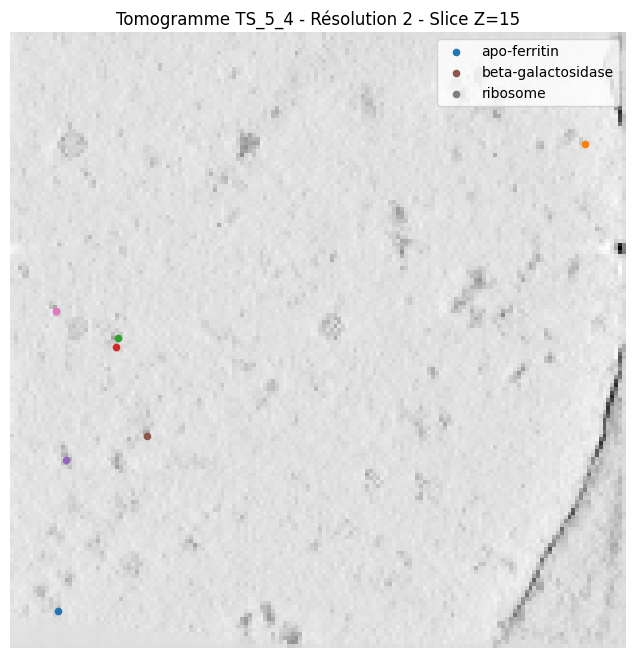

In [12]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# On suppose que les dictionnaires all_data et all_targets ont √©t√© g√©n√©r√©s par vos fonctions process_experiment_runs et load_targets.
# Par exemple :
#   all_data = process_experiment_runs(DATA_DIR)
#   all_targets = load_targets(TARGET_DIR)

# Pour la r√©solution 2, le voxel_size est 4 fois celui de la r√©solution 0 (4 * 10 = 40)
voxel_size = 40  
tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 15  

# Charger la coupe du tomogramme √† la r√©solution 2
tomogram_volume = all_data[tomogram_folder][resolution_group]['data']
image_slice = tomogram_volume[slice_index, :, :]

plt.figure(figsize=(8, 8))
plt.imshow(image_slice, cmap='gray')
plt.title(f"Tomogramme {tomogram_folder} - R√©solution 2 - Slice Z={slice_index}")

# V√©rifier si des cibles (targets) sont pr√©sentes pour ce tomogramme
if tomogram_folder in all_targets:
    molecules = all_targets[tomogram_folder]
    
    # Pour √©viter les doublons dans la l√©gende
    legend_entries = {}
    
    for molecule, points in molecules.items():
        for point in points:
            # Conversion des coordonn√©es physiques en indices voxels en divisant par voxel_size (40 √† cette r√©solution)
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            z = point["location"]["z"] / voxel_size  # Coordonn√©e Z en voxels
            
            # Afficher uniquement les points proches de la slice s√©lectionn√©e
            if abs(z - slice_index) < 0.75:
                sc = plt.scatter(x, y, s=20)
                if molecule not in legend_entries:
                    legend_entries[molecule] = sc

    if legend_entries:
        plt.legend(legend_entries.values(), legend_entries.keys(), loc='upper right')

plt.axis('off')
plt.show()


In [13]:
# --- PARTIE 2 : PR√âPARATION DES PATCHES ET DES MASQUES DE SEGMENTATION ---
import tensorflow as tf
voxel_size = 10  # M√™me valeur utilis√©e pr√©c√©demment

# Mapping des mol√©cules aux indices de classes.
# La classe 0 sera r√©serv√©e au fond.
class_mapping = {
    "background": 0,
    "apo-ferritin": 1,
    "beta-amylase": 2,
    "ribosome": 3,
    "thyroglobulin": 4,
    "virus-like-particle": 5,
    "beta-galactosidase": 6
    # Vous pouvez ajouter d'autres mol√©cules si n√©cessaire.
}

def generate_mask(volume_shape, targets, voxel_size, class_mapping, sphere_radius=2):
    """
    Cr√©e un masque de segmentation (de dimensions volume_shape) √† partir des targets.
    Pour chaque point, on convertit la position physique en indice voxel et on dessine
    une petite sph√®re (de rayon sphere_radius voxels) avec la classe correspondante.
    
    Args:
        volume_shape (tuple): Dimensions du volume (Z, Y, X).
        targets (dict): Dictionnaire des targets avec pour chaque mol√©cule une liste de points.
        voxel_size (float): Facteur de conversion des coordonn√©es physiques en indices voxels.
        class_mapping (dict): Mapping de la mol√©cule vers l'indice de classe (0 pour le fond, >0 pour les particules).
        sphere_radius (int): Rayon de la sph√®re (en voxels) √† dessiner autour de chaque point.
        
    Returns:
        ndarray: Masque de segmentation de dimensions volume_shape.
    """
    mask = np.zeros(volume_shape, dtype=np.uint8)  # Fond = 0
    for molecule, points in targets.items():
        if molecule not in class_mapping:
            continue
        class_idx = class_mapping[molecule]
        for point in points:
            # Si le point est un dictionnaire avec la cl√© "location", on l'utilise
            if isinstance(point, dict) and "location" in point:
                x_coord = point["location"]["x"]
                y_coord = point["location"]["y"]
                z_coord = point["location"]["z"]
            else:
                # Sinon, on suppose que le point est une liste/tuple de coordonn√©es [x, y, z]
                x_coord, y_coord, z_coord = point
            
            x_center = int(round(x_coord / voxel_size))
            y_center = int(round(y_coord / voxel_size))
            z_center = int(round(z_coord / voxel_size))
            
            # Dessiner une petite sph√®re autour du point
            for dz in range(-sphere_radius, sphere_radius + 1):
                for dy in range(-sphere_radius, sphere_radius + 1):
                    for dx in range(-sphere_radius, sphere_radius + 1):
                        if dx**2 + dy**2 + dz**2 <= sphere_radius**2:
                            z_idx = z_center + dz
                            y_idx = y_center + dy
                            x_idx = x_center + dx
                            if (0 <= z_idx < volume_shape[0] and
                                0 <= y_idx < volume_shape[1] and
                                0 <= x_idx < volume_shape[2]):
                                mask[z_idx, y_idx, x_idx] = class_idx
    return mask

def extract_grid_patches(volume, mask, num_cubes_axis):
    """
    Extrait tous les patches qui couvrent enti√®rement le volume en divisant chaque dimension en num_cubes_axis segments.
    On suppose que le volume est exactement divisible par num_cubes_axis sur chaque axe.
    
    Args:
        volume (ndarray): Volume 3D d'entr√©e, de forme (Z, Y, X).
        mask (ndarray): Masque associ√©, de m√™me forme.
        num_cubes_axis (int): Nombre de segments (patchs) par axe (exemple : 4 donnera 4x4x4 = 64 patches).
        
    Returns:
        tuple: (patches_img, patches_mask) 
               - patches_img : liste de patches d'image.
               - patches_mask : liste de patches de masque.
    """
    z_dim, y_dim, x_dim = volume.shape
    patch_size_z = z_dim // num_cubes_axis
    patch_size_y = y_dim // num_cubes_axis
    patch_size_x = x_dim // num_cubes_axis
    
    patches_img = []
    patches_mask = []
    
    for i in range(num_cubes_axis):
        for j in range(num_cubes_axis):
            for k in range(num_cubes_axis):
                z0 = i * patch_size_z
                y0 = j * patch_size_y
                x0 = k * patch_size_x
                patch_img = volume[z0:z0+patch_size_z, y0:y0+patch_size_y, x0:x0+patch_size_x]
                patch_mask = mask[z0:z0+patch_size_z, y0:y0+patch_size_y, x0:x0+patch_size_x]
                patches_img.append(patch_img)
                patches_mask.append(patch_mask)
    
    return patches_img, patches_mask



In [14]:
X_train_list = []
Y_train_list = []

# Ici, num_cubes_axis doit √™tre choisi de fa√ßon √† diviser exactement les dimensions du volume.
# Par exemple, pour le volume (184, 630, 630), on pourra choisir num_cubes_axis = 2 ou 4
# si les dimensions sont exactement divisibles par ce nombre.
num_cubes_axis = 2  # Exemple : divise le volume en 2x2x2 = 8 patches

for tomogram in dataset:
    volume = tomogram["images"][2]  # Utilisation de la r√©solution la plus fine
    mask_full = generate_mask(volume.shape, tomogram["targets"], voxel_size, class_mapping)
    print(f"Tomogramme {tomogram['name']} volume: {volume.shape}, masque: {mask_full.shape}")
    
    patches_img, patches_mask = extract_grid_patches(volume, mask_full, num_cubes_axis)
    
    for patch_img, patch_mask in zip(patches_img, patches_mask):
         # On ajoute la dimension de canal √† l'image patch (le mod√®le attend (patch_size_z, patch_size_y, patch_size_x, 1))
         patch_img = patch_img[..., np.newaxis]
         X_train_list.append(patch_img)
         Y_train_list.append(patch_mask)

X_train = np.array(X_train_list, dtype=np.float32)
Y_train_int = np.array(Y_train_list, dtype=np.uint8)
print("X_train shape:", X_train.shape)
print("Y_train_int shape:", Y_train_int.shape)

# Conversion du masque en encodage one-hot (le mod√®le attend n_classes canaux en sortie)
Y_train = tf.keras.utils.to_categorical(Y_train_int, num_classes=7)
print("Y_train shape (one-hot):", Y_train.shape)

Tomogramme TS_5_4 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_69_2 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_6_4 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_6_6 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_73_6 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_86_3 volume: (46, 158, 158), masque: (46, 158, 158)
Tomogramme TS_99_9 volume: (46, 158, 158), masque: (46, 158, 158)
X_train shape: (56, 23, 79, 79, 1)
Y_train_int shape: (56, 23, 79, 79)
Y_train shape (one-hot): (56, 23, 79, 79, 7)


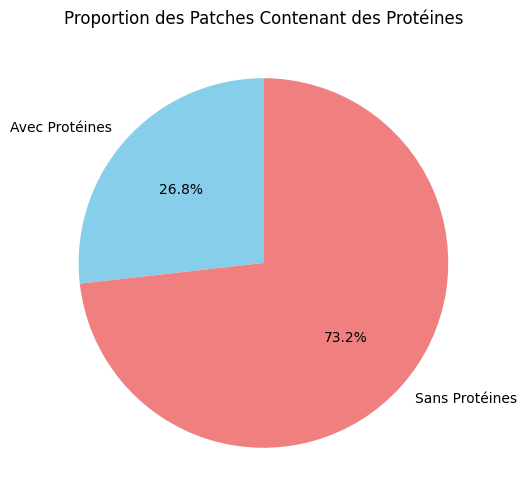

(15, 41, 56)

In [15]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt

# Reload Y_train_int if available
# Assuming Y_train_int is available after the reset
# If not, you may need to redefine and reload the dataset

# Determine the presence of proteins in each patch (binary: 0 = background, 1 = contains proteins)
patch_contains_protein = (Y_train_int > 0).any(axis=(1, 2, 3))

# Compute proportions
num_patches = len(Y_train_int)
num_with_proteins = np.sum(patch_contains_protein)
num_without_proteins = num_patches - num_with_proteins

# Display as a pie chart
labels = ["Avec Prot√©ines", "Sans Prot√©ines"]
sizes = [num_with_proteins, num_without_proteins]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title("Proportion des Patches Contenant des Prot√©ines")
plt.show()

# Display numerical results
num_with_proteins, num_without_proteins, num_patches


In [16]:
import numpy as np
import pandas as pd

# --- Suppression des patchs sans prot√©ines ---
indices_with_protein = np.where((Y_train_int > 0).any(axis=(1, 2, 3)))[0]

# Construire les nouveaux ensembles filtr√©s
X_train_balanced = X_train[indices_with_protein]
Y_train_int_balanced = Y_train_int[indices_with_protein]

# V√©rifier la distribution des classes (y compris le background)
unique_classes, counts = np.unique(Y_train_int_balanced, return_counts=True)

# Mapping des classes vers les noms de prot√©ines
class_labels = {
    0: "Background",
    1: "Apo-Ferritin",
    2: "Beta-Amylase",
    3: "Beta-Galactosidase",
    4: "Ribosome",
    5: "Thyroglobulin",
    6: "Virus-Like-Particle"
}

# Calculer le pourcentage exact de chaque classe
total_voxels = np.sum(counts)
percentages = (counts / total_voxels) * 100

# Construire un tableau avec les noms des classes et leurs pourcentages exacts
df_percentages = pd.DataFrame({
    "Classe": [class_labels.get(int(cls), f"Classe {cls}") for cls in unique_classes],
    "Nombre de Voxels": counts,
    "Pourcentage (%)": percentages
})

print(df_percentages)

               Classe  Nombre de Voxels  Pourcentage (%)
0          Background           2152530        99.971437
1        Apo-Ferritin                53         0.002462
2        Beta-Amylase                33         0.001533
3  Beta-Galactosidase               462         0.021457
4            Ribosome                67         0.003112


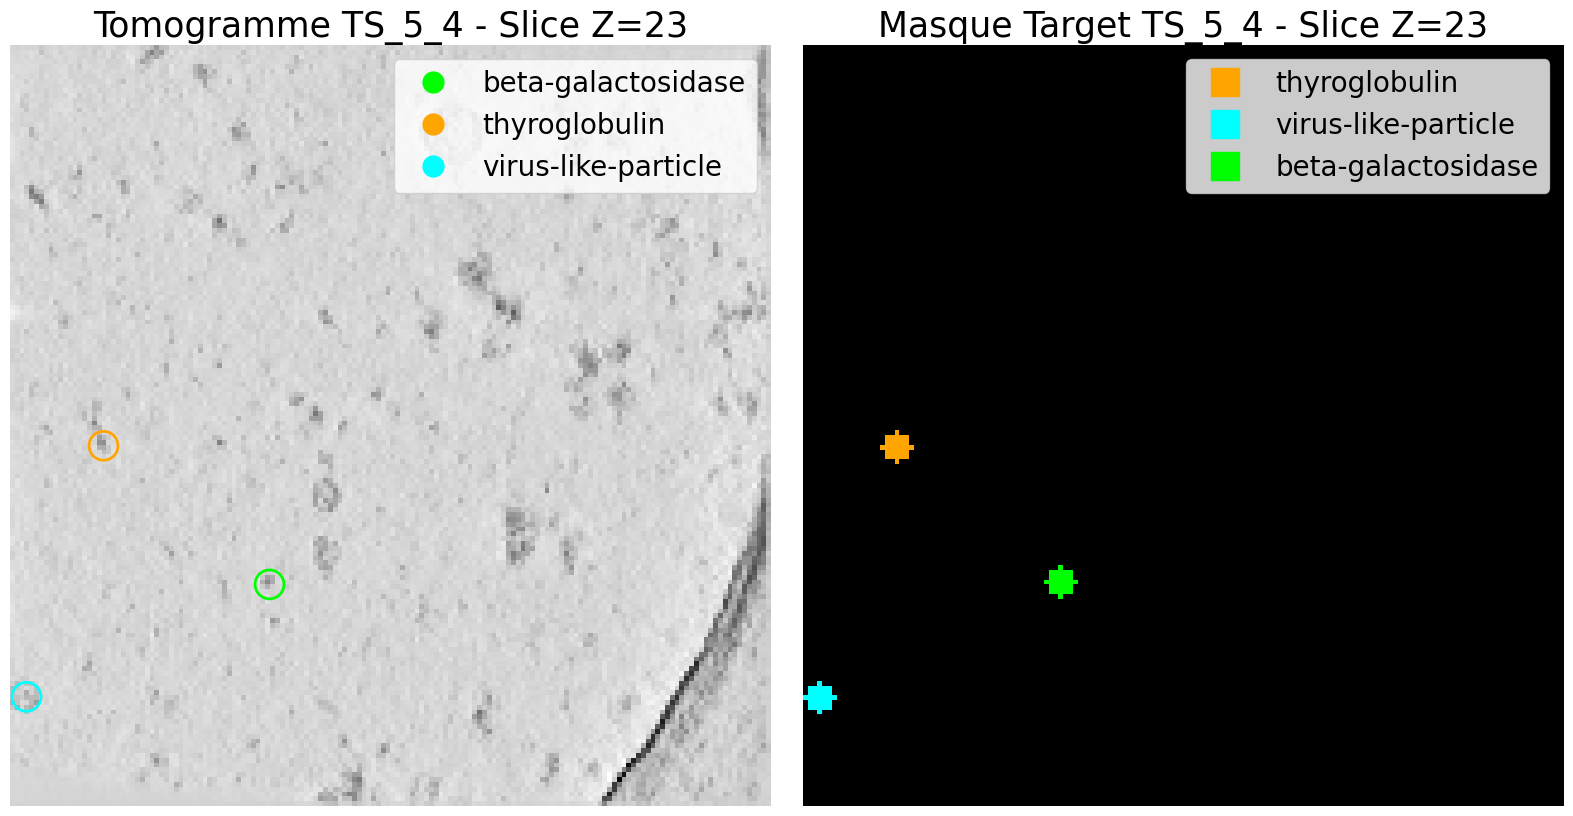

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def generate_colored_mask(volume_shape, targets, voxel_size, class_mapping, slice_index, sphere_radius=3, colors=None):
    """
    G√©n√®re une image couleur 2D du masque pour une slice Z donn√©e, 
    avec les couleurs correspondant aux prot√©ines affich√©es dans la l√©gende.
    """
    mask_slice = np.zeros((volume_shape[1], volume_shape[2], 3), dtype=np.uint8)  # Image couleur (Y, X, RGB)
    
    for molecule, points in targets.items():
        if molecule not in class_mapping:
            continue
        color = colors.get(molecule, (255, 255, 255))  # Blanc par d√©faut si couleur non d√©finie

        for point in points:
            # Extraire les coordonn√©es et convertir en indices de voxel
            x_coord = int(round(point["location"]["x"] / voxel_size))
            y_coord = int(round(point["location"]["y"] / voxel_size))
            z_coord = int(round(point["location"]["z"] / voxel_size))
            
            # V√©rifier si la particule appartient √† la slice s√©lectionn√©e
            if z_coord == slice_index:
                for dy in range(-sphere_radius, sphere_radius + 1):
                    for dx in range(-sphere_radius, sphere_radius + 1):
                        if dx**2 + dy**2 <= sphere_radius**2:  # Approximation d'un cercle
                            y_idx = y_coord + dy
                            x_idx = x_coord + dx
                            if 0 <= y_idx < volume_shape[1] and 0 <= x_idx < volume_shape[2]:
                                mask_slice[y_idx, x_idx] = color  # Appliquer la couleur sp√©cifique

    return mask_slice

def display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, voxel_size, class_mapping, sphere_radius=3):
    """
    Affiche c√¥te √† c√¥te la coupe du tomogramme et le masque target coloris√©.
    """
    # Charger le volume et extraire la coupe
    volume = all_data[tomogram_folder][resolution_group]['data']
    image_slice = volume[slice_index, :, :]

    # Filtrer uniquement les prot√©ines visibles sur la coupe s√©lectionn√©e
    targets_filtered = {}
    for molecule, points in all_targets.get(tomogram_folder, {}).items():
        filtered_points = [p for p in points if round(p["location"]["z"] / voxel_size) == slice_index]
        if filtered_points:
            targets_filtered[molecule] = filtered_points

    # Palette de couleurs associ√©e aux mol√©cules (en format RGB)
    colors = {
        "apo-ferritin": (255, 0, 0),        # Rouge
        "beta-amylase": (0, 0, 255),        # Bleu
        "ribosome": (128, 0, 128),          # Violet
        "thyroglobulin": (255, 165, 0),     # Orange
        "virus-like-particle": (0, 255, 255),  # Cyan
        "beta-galactosidase": (0, 255, 0)   # Vert
    }

    # G√©n√©rer le masque color√©
    mask_colored = generate_colored_mask(volume.shape, targets_filtered, voxel_size, class_mapping, slice_index, sphere_radius, colors)

    # Cr√©ation de la figure avec deux sous-graphes
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # --- Affichage de la coupe du tomogramme avec les targets ---
    axs[0].imshow(image_slice, cmap='gray')
    axs[0].set_title(f"Tomogramme {tomogram_folder} - Slice Z={slice_index}", fontsize=25)

    legend_entries = {}
    for molecule, points in targets_filtered.items():
        color = np.array(colors.get(molecule, (255, 255, 255))) / 255  # Normaliser en [0,1]
        for point in points:
            x = point["location"]["x"] / voxel_size
            y = point["location"]["y"] / voxel_size
            circle = plt.Circle((x, y), radius=sphere_radius, color=color, fill=False, linewidth=2)
            axs[0].add_patch(circle)

            if molecule not in legend_entries:
                legend_entries[molecule] = plt.Line2D([0], [0], marker='o', color=color, markersize=15, linestyle='', label=molecule)

    if legend_entries:
        axs[0].legend(handles=legend_entries.values(), loc='upper right', fontsize=20)  # üîπ Taille de l√©gende augment√©e
    axs[0].axis('off')

    # --- Affichage du masque color√© ---
    axs[1].imshow(mask_colored)  # Pas de cmap car l'image est en couleur
    axs[1].set_title(f"Masque Target {tomogram_folder} - Slice Z={slice_index}", fontsize=25)

    # Ajouter une l√©gende bas√©e sur les couleurs des prot√©ines
    legend_entries_mask = [
        plt.Line2D([0], [0], marker='s', color=np.array(color)/255, markersize=20, linestyle='', label=molecule)
        for molecule, color in colors.items() if molecule in targets_filtered
    ]
    
    if legend_entries_mask:
        axs[1].legend(handles=legend_entries_mask, loc='upper right', fontsize=20)  # üîπ Taille de l√©gende augment√©e
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


# --- Exemple d'utilisation ---
voxel_size = 40
tomogram_folder = 'TS_5_4'
resolution_group = '2'
slice_index = 23  # Slice Z √† afficher

display_tomogram_and_target(all_data, all_targets, tomogram_folder, resolution_group, slice_index, voxel_size, class_mapping, sphere_radius=3)


In [18]:
# D√©finir le nombre de classes (5 classes au total, y compris le background)
num_classes = 5

# Conversion de Y_train_int_balanced en encodage one-hot
Y_train_balanced = tf.keras.utils.to_categorical(Y_train_int_balanced, num_classes=num_classes)

# V√©rifier la nouvelle shape
Y_train_balanced.shape


(15, 23, 79, 79, 5)

In [19]:
import numpy as np

# Afficher les valeurs uniques pr√©sentes dans Y_train (donn√©es segment√©es)
unique_values = np.unique(Y_train_int)  # Y_train_int est la version non one-hot de Y_train

unique_values


array([0, 1, 2, 3, 4], dtype=uint8)

In [20]:
import numpy as np

# Afficher les valeurs uniques pr√©sentes dans Y_train (donn√©es segment√©es)
unique_values = np.unique(Y_train)  # Y_train_int est la version non one-hot de Y_train

unique_values


array([0., 1.])

In [21]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import albumentations as A
import cv2  # Pour la redimension des images et masques

# D√©finition des transformations avec le bon mode pour les masques
transformations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5)
], additional_targets={'mask': 'mask'})

def apply_augmentations(image, mask):
    """Applique les transformations de mani√®re synchronis√©e sur l'image et son masque."""
    transformed = transformations(image=image, mask=mask)
    augmented_image = transformed['image']
    augmented_mask = transformed['mask']

    # ‚úÖ Conserver les valeurs discr√®tes des masques (√©vite d'avoir des valeurs interm√©diaires)
    augmented_mask = np.round(augmented_mask).astype(np.uint8)

    # ‚úÖ S'assurer que l'image et le masque gardent leur taille originale
    original_shape = image.shape
    augmented_image = cv2.resize(augmented_image, (original_shape[2], original_shape[1]), interpolation=cv2.INTER_LINEAR)
    augmented_mask = cv2.resize(augmented_mask, (original_shape[2], original_shape[1]), interpolation=cv2.INTER_NEAREST)

    return augmented_image, augmented_mask

# Appliquer la data augmentation et reconstruire le dataset
X_train_augmented = []
Y_train_augmented = []

for i in range(len(X_train_balanced)):
    image = X_train_balanced[i]
    mask = Y_train_int_balanced[i]
    
    if np.any(mask > 0):  # V√©rifier si le patch contient une prot√©ine
        augmented_image, augmented_mask = apply_augmentations(image.squeeze(), mask)

        # ‚úÖ R√©tablir les dimensions
        augmented_image = np.array(augmented_image, dtype=np.float32)
        augmented_mask = np.array(augmented_mask, dtype=np.uint8)

        # ‚úÖ Convertir le masque en one-hot encoding avant de l'ajouter
        Y_train_augmented.append(tf.keras.utils.to_categorical(augmented_mask, num_classes=5))
    else:
        Y_train_augmented.append(tf.keras.utils.to_categorical(mask, num_classes=5))

    # Ajouter l'image augment√©e
    X_train_augmented.append(augmented_image[..., np.newaxis])  # Restaure la dimension du canal

# ‚úÖ Convertir en numpy array apr√®s correction des tailles
X_train_augmented = np.array(X_train_augmented, dtype=np.float32)
Y_train_augmented = np.array(Y_train_augmented, dtype=np.uint8)

# V√©rifier les nouvelles tailles
print("X_train_augmented shape:", X_train_augmented.shape)
print("Y_train_augmented shape:", Y_train_augmented.shape)


c:\Users\noemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


X_train_augmented shape: (15, 79, 79, 79, 1)
Y_train_augmented shape: (15, 79, 79, 79, 5)


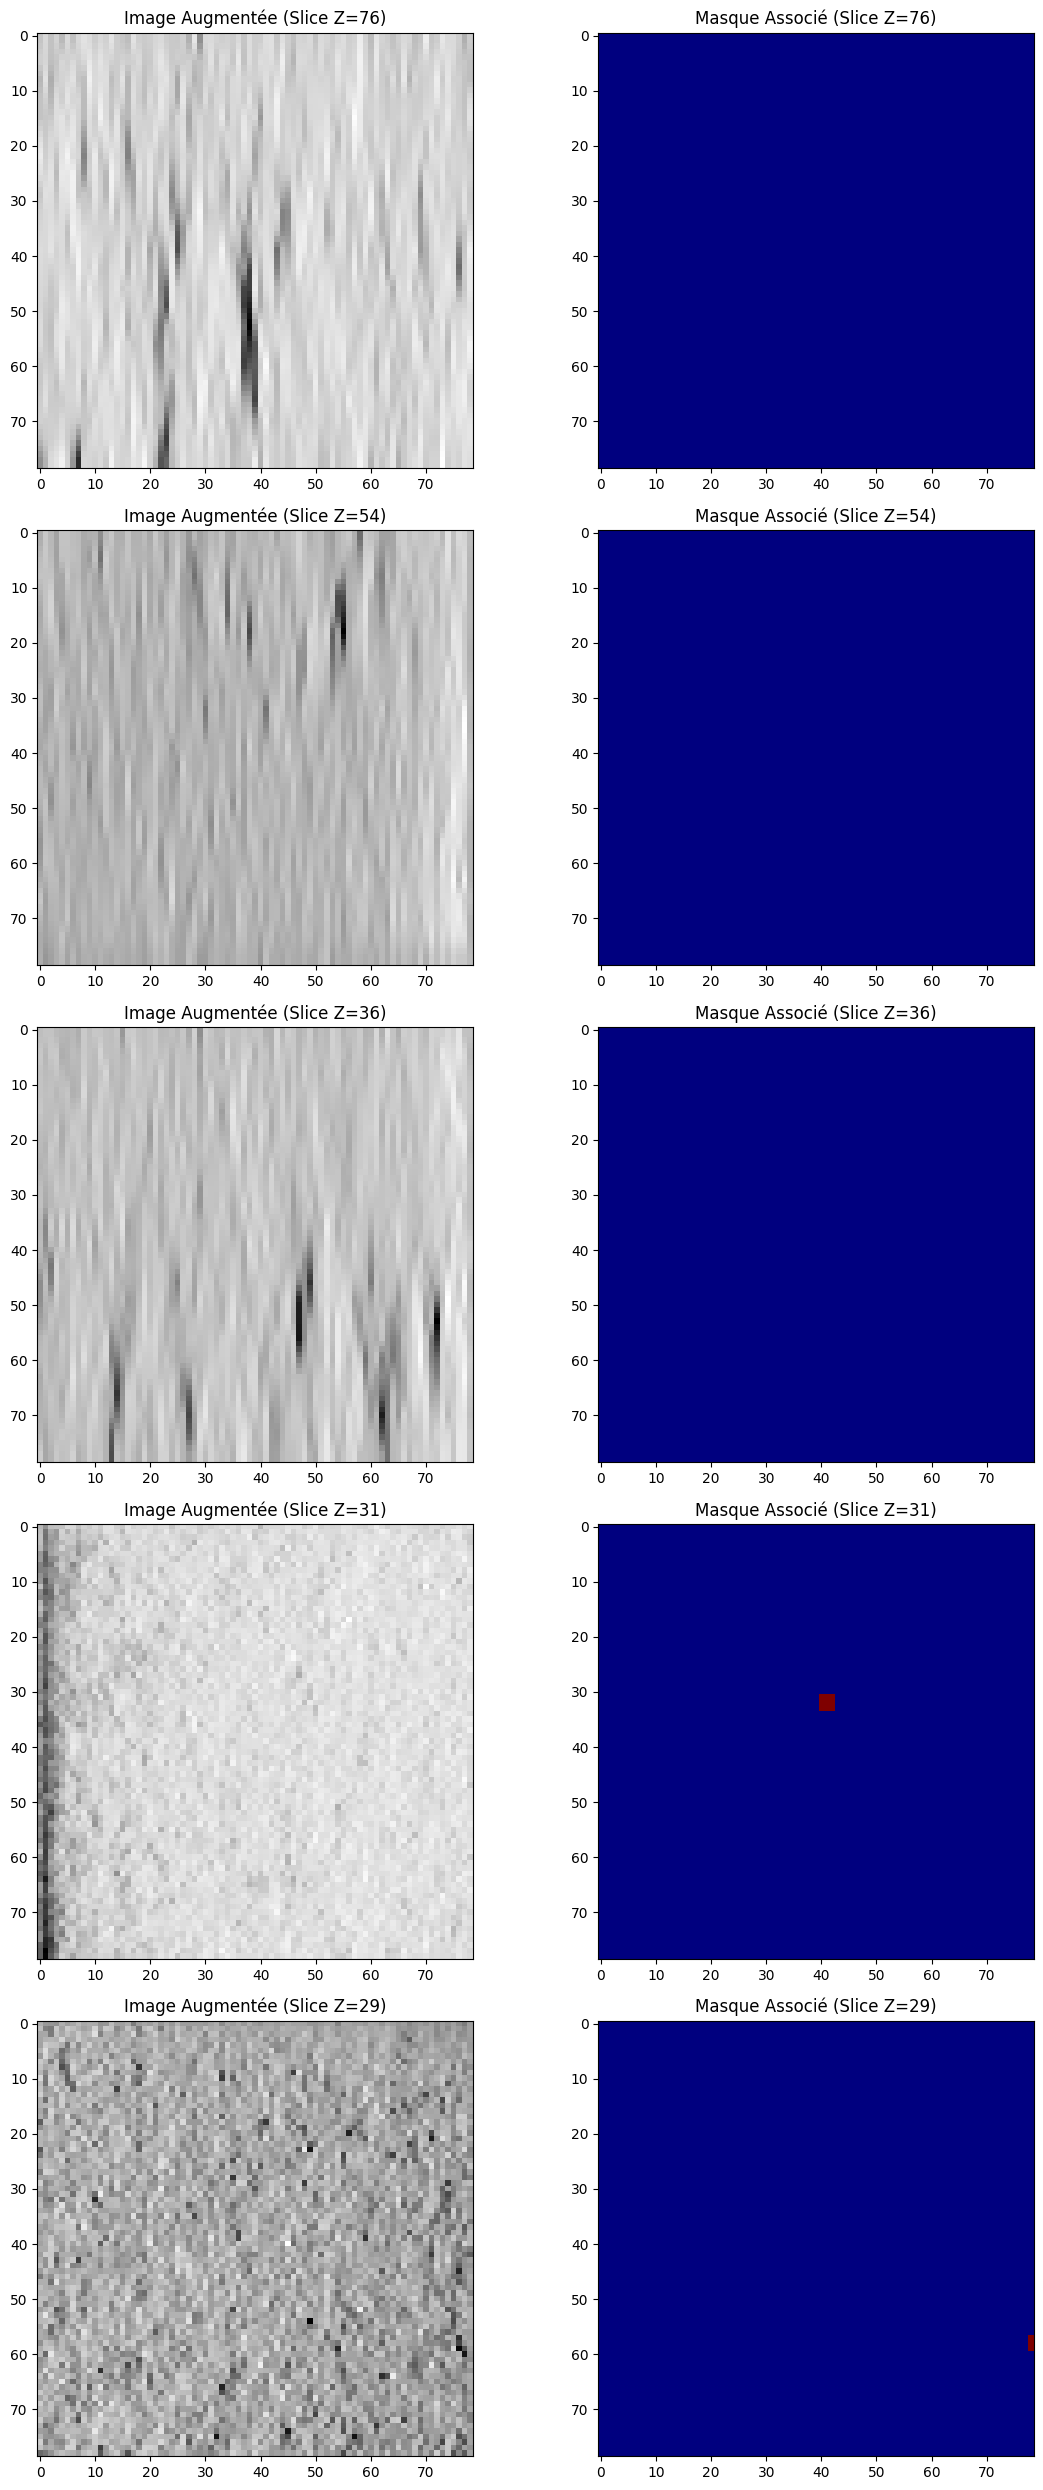

In [22]:
import matplotlib.pyplot as plt

# --- V√©rification visuelle de la correspondance image/masque ---
def visualize_augmented_samples(X_aug, Y_aug, num_samples=5):
    """Affiche plusieurs exemples d'images augment√©es avec leurs masques."""
    indices = np.random.choice(len(X_aug), num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 2, figsize=(12, num_samples * 5))

    for i, idx in enumerate(indices):
        image = X_aug[idx].squeeze()
        mask = np.argmax(Y_aug[idx], axis=-1)  # ‚úÖ Convertir one-hot en classes

        slice_idx = random.randint(0, image.shape[0] - 1)  # Choix d'une slice Z al√©atoire

        axes[i, 0].imshow(image[slice_idx, :, :], cmap='gray')
        axes[i, 0].set_title(f"Image Augment√©e (Slice Z={slice_idx})")

        axes[i, 1].imshow(mask[slice_idx, :, :], cmap='jet')
        axes[i, 1].set_title(f"Masque Associ√© (Slice Z={slice_idx})")

    plt.tight_layout()
    plt.show()

# Visualisation des exemples apr√®s augmentation
visualize_augmented_samples(X_train_augmented, Y_train_augmented, num_samples=5)


In [23]:
from sklearn.model_selection import train_test_split

# 1. S√©parer X_train_balanced et Y_train_balanced en train + temp (80% - 20%)
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_train_augmented, Y_train_augmented, test_size=0.2, random_state=42)

# 2. S√©parer X_temp et Y_temp en validation et test (50% pour chacun de la partie 20%)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42)

# Afficher les tailles des splits
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
print(f"Train set: {Y_train.shape}, Validation set: {Y_val.shape}, Test set: {Y_test.shape}")

Train set: (12, 79, 79, 79, 1), Validation set: (1, 79, 79, 79, 1), Test set: (2, 79, 79, 79, 1)
Train set: (12, 79, 79, 79, 5), Validation set: (1, 79, 79, 79, 5), Test set: (2, 79, 79, 79, 5)


In [24]:
# def protein_accuracy(y_true, y_pred):
#     y_true_labels = tf.argmax(y_true, axis=-1)
#     y_pred_labels = tf.argmax(y_pred, axis=-1)
#     mask = tf.not_equal(y_true_labels, 0)
#     correct = tf.equal(y_true_labels, y_pred_labels)
#     correct_masked = tf.boolean_mask(correct, mask)
    
#     # Si aucun voxel de prot√©ine n'est pr√©sent, retourner 0 pour √©viter NaN.
#     return tf.cond(tf.equal(tf.size(correct_masked), 0),
#                    lambda: tf.constant(0.0, dtype=tf.float32),
#                    lambda: tf.reduce_mean(tf.cast(correct_masked, tf.float32)))


def protein_accuracy(y_true, y_pred):
    y_true_labels = tf.argmax(y_true, axis=-1)
    y_pred_labels = tf.argmax(y_pred, axis=-1)
    mask = tf.not_equal(y_true_labels, 0)
    correct = tf.equal(y_true_labels, y_pred_labels)
    correct_masked = tf.boolean_mask(correct, mask)

    return tf.reduce_sum(tf.cast(correct_masked, tf.float32)) / tf.maximum(1.0, tf.reduce_sum(tf.cast(mask, tf.float32)))



In [25]:
import numpy as np
import tensorflow as tf

# Appliquer ZeroPadding3D sur X_train et X_val (sans modifier le mod√®le)
def pad_input_data(X_data):
    """Ajoute un padding 3D autour des volumes d'entr√©e pour qu'ils aient une taille 80x80x80."""
    return np.pad(X_data, ((0, 0), (0, 1), (0, 1), (0, 1), (0, 0)), mode='constant', constant_values=0)

def pad_output_data(Y_data):
    """Ajoute un padding 3D sur les masques pour les aligner avec X_train."""
    return np.pad(Y_data, ((0, 0), (0, 1), (0, 1), (0, 1), (0, 0)), mode='constant', constant_values=0)

# --- Application du padding ---
X_train_padded = pad_input_data(X_train)  # (12, 80, 80, 80, 1)
Y_train_padded = pad_output_data(Y_train)  # (12, 80, 80, 80, 5)
X_val_padded = pad_input_data(X_val)  # (val_size, 80, 80, 80, 1)
Y_val_padded = pad_output_data(Y_val)  # (val_size, 80, 80, 80, 5)


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, UpSampling3D, Concatenate, 
                                     Dropout, BatchNormalization, Activation, Cropping3D, ZeroPadding3D)
from tensorflow.keras.models import Model

# Mapping des mol√©cules vers leurs indices (classe 0 = fond)
class_mapping = {
    "background": 0,
    "apo-ferritin": 1,
    "beta-amylase": 2,
    "ribosome": 3,
    "thyroglobulin": 4
}

# Nombre de classes mises √† jour
n_classes = 5

def weighted_categorical_crossentropy(weights_dict, class_mapping, num_classes):
    """ Fonction de perte pond√©r√©e qui ignore le fond (classe 0). """
    weight_vector = np.ones(num_classes, dtype=np.float32)
    for molecule, class_idx in class_mapping.items():
        if molecule in weights_dict:
            weight_vector[class_idx] = weights_dict[molecule]
    weight_vector = tf.constant(weight_vector, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1.0)
        loss_unweighted = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)

        # Exclure les voxels de classe 0 (fond)
        true_class = tf.argmax(y_true, axis=-1)
        mask = tf.not_equal(true_class, 0)
        voxel_weights = tf.gather(weight_vector, true_class)
        weighted_loss = loss_unweighted * voxel_weights

        masked_loss = tf.boolean_mask(weighted_loss, mask)

        return tf.cond(
            tf.greater(tf.size(masked_loss), 0),
            lambda: tf.reduce_mean(masked_loss),
            lambda: tf.constant(0.0, dtype=tf.float32)
        )

    return loss

def conv_block(inputs, n_filters, dropout=0, batch_norm=True):
    """Bloc de convolution avec BatchNormalization et Dropout."""
    x = Conv3D(n_filters, kernel_size=3, padding='same')(inputs)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv3D(n_filters, kernel_size=3, padding='same')(x)
    if batch_norm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    if dropout > 0:
        x = Dropout(dropout)(x)
    return x

def unet3d_model(input_shape, n_classes, filters=[32, 64, 128, 256], dropout=0.1):
    """D√©finition du mod√®le U-Net 3D sans ZeroPadding3D."""
    inputs = Input(input_shape)

    # --- Encodeur ---
    c1 = conv_block(inputs, filters[0], dropout)
    p1 = MaxPooling3D(pool_size=(2,2,2), padding="valid")(c1)  

    c2 = conv_block(p1, filters[1], dropout)
    p2 = MaxPooling3D(pool_size=(2,2,2), padding="valid")(c2)

    c3 = conv_block(p2, filters[2], dropout)
    p3 = MaxPooling3D(pool_size=(2,2,2), padding="valid")(c3)

    # --- Bottleneck ---
    c4 = conv_block(p3, filters[3], dropout)

    # --- D√©codeur ---
    u3 = UpSampling3D(size=(2,2,2))(c4)
    c5 = conv_block(u3, filters[2], dropout)

    u2 = UpSampling3D(size=(2,2,2))(c5)
    c6 = conv_block(u2, filters[1], dropout)

    u1 = UpSampling3D(size=(2,2,2))(c6)
    c7 = conv_block(u1, filters[0], dropout)

    # --- Sortie ---
    outputs = Conv3D(n_classes, kernel_size=1, activation='softmax')(c7)

    model = Model(inputs=inputs, outputs=outputs)
    return model




input_shape = (79, 79, 79, 1)  
filters = [32, 64, 128, 256]  
dropout = 0.1  
n_classes = 5

# D√©finir la perte pond√©r√©e
protein_weights = {
    "background": 1,
    "apo-ferritin": 2,
    "beta-amylase": 2,
    "ribosome": 3,
    "thyroglobulin": 3
}




In [30]:
from tensorflow.keras.callbacks import EarlyStopping



loss_fn = weighted_categorical_crossentropy(protein_weights, class_mapping, n_classes)

# Instancier le mod√®le
model = unet3d_model(input_shape=(80, 80, 80, 1), n_classes=n_classes, filters=filters, dropout=dropout)

# Compilation du mod√®le
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy', protein_accuracy])

# Cr√©ation du callback EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Entra√Ænement avec early stopping
history = model.fit(X_train_padded, Y_train_padded,
                    batch_size=1,
                    epochs=5,
                    validation_data=(X_val_padded, Y_val_padded),
                    callbacks=[early_stopping])


Epoch 1/5
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 2s/step - accuracy: 0.2221 - loss: 4.4798 - protein_accuracy: 0.2952 - val_accuracy: 2.2070e-04 - val_loss: 4.7165 - val_protein_accuracy: 1.0000
Epoch 2/5
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 2s/step - accuracy: 0.2344 - loss: 3.7675 - protein_accuracy: 0.4729 - val_accuracy: 2.1875e-04 - val_loss: 4.6397 - val_protein_accuracy: 0.9912
Epoch 3/5
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 2s/step - accuracy: 0.2259 - loss: 1.6430 - protein_accuracy: 0.7788 - val_accuracy: 1.2695e-04 - val_loss: 4.6200 - val_protein_accuracy: 0.5752
Epoch 4/5
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 2s/step - accuracy: 0.2248 - loss: 1.1852 - protein_accuracy: 0.8926 - val_accuracy: 0.1597 - val_loss: 4.8883 - val_protein_accuracy: 0.0088
Epoch 5/5
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 2s/step - accur

In [31]:
# Sauvegarde du mod√®le entra√Æn√© (mod√®le complet, y compris l'architecture, les poids et les param√®tres d'optimisation et fonction de perte)
model.save('unet3d_trained_model.keras')

In [32]:
# # Red√©finir la fonction de perte pour l'utiliser dans le chargement du mod√®le
# loss_fn = weighted_categorical_crossentropy(protein_weights, class_mapping, n_classes)

# # Charger le mod√®le avec la bonne fonction de perte et la m√©trique personnalis√©e
# model = tf.keras.models.load_model(
#     "unet3d_trained_model.keras",
#     custom_objects={
#         "protein_accuracy": protein_accuracy,
#         "loss": loss_fn
#     }
# )



# # V√©rifier que le mod√®le est bien charg√©
# model.summary()


In [27]:
# S√©lectionner un patch au hasard dans X_test
index = np.random.randint(0, len(X_test))

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# üîπ **Palette de couleurs pour les prot√©ines**
colors = {
    0: "gray",
    1: "red",
    2: "blue",
    3: "green",
    4: "purple",
    5: "orange",
    6: "cyan",
}

# üîπ **Mapping des classes vers les noms des prot√©ines**
class_labels = {
    0: "Fond",
    1: "apo-ferritin",
    2: "beta-amylase",
    3: "ribosome",
    4: "thyroglobulin",
    5: "virus-like-particle",
    6: "beta-galactosidase"
}

# --- S√©lectionner un patch al√©atoire dans X_train ---
index = np.random.randint(0, len(X_train))

# --- Extraire le patch d'entra√Ænement ---
x_sample = X_train[index]  # (79, 79, 79, 1)
y_true = Y_train[index]    # (79, 79, 79, 5) -> One-hot

# --- Ajouter Zero Padding pour l'inf√©rence ---
def pad_input_data(X_data):
    """Ajoute un padding 3D autour des volumes d'entr√©e pour qu'ils aient une taille 80x80x80."""
    return np.pad(X_data, ((0, 1), (0, 1), (0, 1), (0, 0)), mode='constant', constant_values=0)

def pad_output_data(Y_data):
    """Ajoute un padding 3D sur les masques pour aligner avec X_train."""
    return np.pad(Y_data, ((0, 1), (0, 1), (0, 1), (0, 0)), mode='constant', constant_values=0)

x_sample_padded = pad_input_data(x_sample)  # (80, 80, 80, 1)
y_true_padded = pad_output_data(y_true)  # (80, 80, 80, 5)

# --- Ajouter une dimension batch pour l'inf√©rence ---
x_sample_expanded = np.expand_dims(x_sample_padded, axis=0)  # (1, 80, 80, 80, 1)

# --- Effectuer la pr√©diction ---
y_pred = model.predict(x_sample_expanded)

# --- Convertir y_pred en indices de classes ---
y_pred_classes_padded = np.argmax(y_pred[0], axis=-1)  # (80, 80, 80)
y_true_classes_padded = np.argmax(y_true_padded, axis=-1)  # (80, 80, 80)

# --- Supprimer le padding pour revenir √† (79, 79, 79) ---
y_pred_classes = y_pred_classes_padded[:-1, :-1, :-1]  # (79, 79, 79)
y_true_classes = y_true_classes_padded[:-1, :-1, :-1]  # (79, 79, 79)

# üîπ V√©rification des formes finales üîπ
print("x_sample shape (original) :", x_sample.shape)
print("x_sample_padded shape :", x_sample_padded.shape)
print("y_pred_classes shape :", y_pred_classes.shape)
print("y_true_classes shape :", y_true_classes.shape)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
x_sample shape (original) : (79, 79, 79, 1)
x_sample_padded shape : (80, 80, 80, 1)
y_pred_classes shape : (79, 79, 79)
y_true_classes shape : (79, 79, 79)


In [36]:
np.unique(y_true_classes)

array([0, 3], dtype=int64)

In [38]:
np.unique(y_pred_classes)

array([1, 3], dtype=int64)

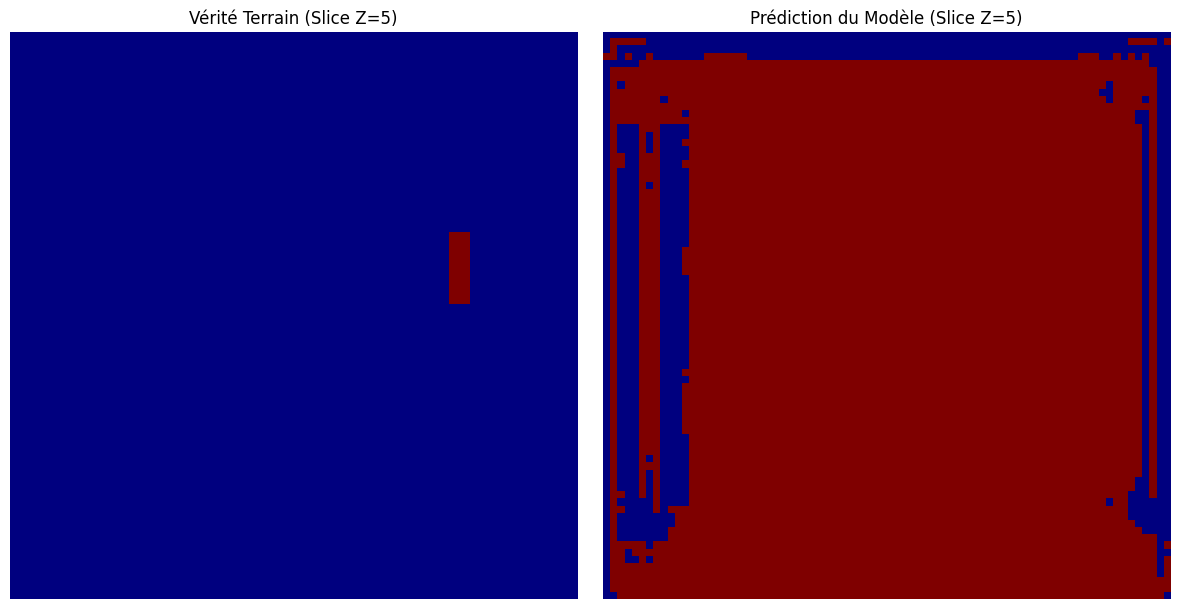

In [34]:
import matplotlib.pyplot as plt


def visualize_prediction(y_true, y_pred, slice_idx=None):
    """
    Visualise une coupe (slice) d'un volume 3D pour comparer la v√©rit√© terrain (y_true) et la pr√©diction (y_pred).
    """
    # S√©lectionner une slice al√©atoire si non sp√©cifi√©e
    if slice_idx is None:
        slice_idx = np.random.randint(0, y_true.shape[0])  # Slice al√©atoire sur l'axe Z

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # üîπ Affichage de la v√©rit√© terrain (y_true)
    axes[0].imshow(y_true[slice_idx, :, :], cmap="jet", interpolation="nearest")
    axes[0].set_title(f"V√©rit√© Terrain (Slice Z={slice_idx})")
    axes[0].axis("off")

    # üîπ Affichage de la pr√©diction (y_pred)
    axes[1].imshow(y_pred[slice_idx, :, :], cmap="jet", interpolation="nearest")
    axes[1].set_title(f"Pr√©diction du Mod√®le (Slice Z={slice_idx})")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# üîπ Visualisation des pr√©dictions sur un exemple al√©atoire
visualize_prediction(y_true_classes, y_pred_classes)


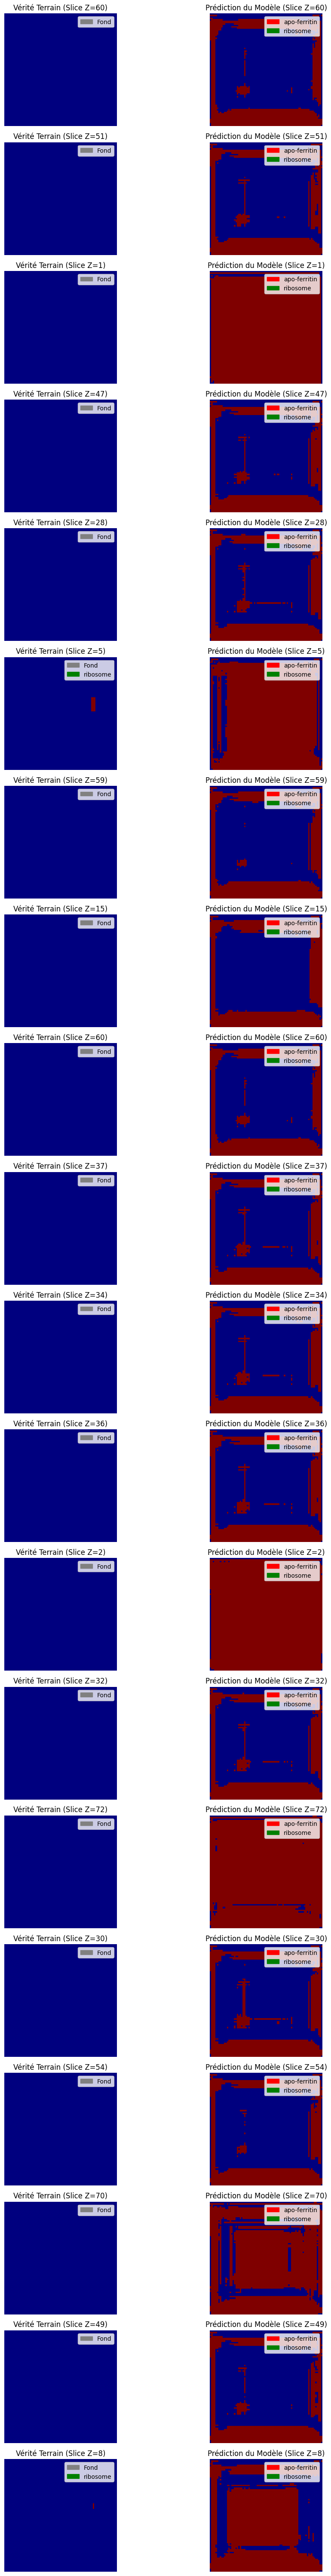

In [39]:
import matplotlib.patches as mpatches

# üîπ D√©finition du mapping des classes
class_mapping = {
    0: "Background",
    1: "Apo-Ferritin",
    2: "Beta-Amylase",
    3: "Ribosome",
    4: "Thyroglobulin",
    5: "Virus-Like-Particle",
    6: "Beta-Galactosidase"
}

# üîπ D√©finition des couleurs associ√©es
colors = {
    0: "gray",
    1: "red",
    2: "blue",
    3: "green",
    4: "purple",
    5: "orange",
    6: "cyan",
}

def visualize_prediction_with_individual_legends(y_true, y_pred, num_samples=20):
    """
    Visualise plusieurs coupes 2D (slices) d'un volume 3D pour comparer la v√©rit√© terrain (y_true) et la pr√©diction (y_pred)
    avec une l√©gende indiquant les classes de prot√©ines d√©tect√©es pour chaque image.
    """
    num_samples = min(num_samples, y_true.shape[0])  # S'assurer que l'on ne d√©passe pas le nombre de slices disponibles

    fig, axes = plt.subplots(num_samples, 2, figsize=(12, num_samples * 3))

    for i in range(num_samples):
        slice_idx = np.random.randint(0, y_true.shape[0])  # Slice al√©atoire sur l'axe Z

        # R√©cup√©rer les classes pr√©sentes dans y_true et y_pred pour cette slice
        unique_true_classes = np.unique(y_true[slice_idx])
        unique_pred_classes = np.unique(y_pred[slice_idx])

        # Cr√©ation des l√©gendes sp√©cifiques pour chaque image
        true_legend_patches = [mpatches.Patch(color=colors[class_id], label=class_labels[class_id]) 
                               for class_id in unique_true_classes]
        
        pred_legend_patches = [mpatches.Patch(color=colors[class_id], label=class_labels[class_id]) 
                               for class_id in unique_pred_classes]

        # üîπ Affichage de la v√©rit√© terrain (y_true)
        axes[i, 0].imshow(y_true[slice_idx, :, :], cmap="jet", interpolation="nearest")
        axes[i, 0].set_title(f"V√©rit√© Terrain (Slice Z={slice_idx})")
        axes[i, 0].axis("off")

        # Ajouter la l√©gende sp√©cifique √† cette image
        axes[i, 0].legend(handles=true_legend_patches, loc="upper right", fontsize=10)

        # üîπ Affichage de la pr√©diction (y_pred)
        axes[i, 1].imshow(y_pred[slice_idx, :, :], cmap="jet", interpolation="nearest")
        axes[i, 1].set_title(f"Pr√©diction du Mod√®le (Slice Z={slice_idx})")
        axes[i, 1].axis("off")

        # Ajouter la l√©gende sp√©cifique √† cette image
        axes[i, 1].legend(handles=pred_legend_patches, loc="upper right", fontsize=10)

    plt.tight_layout()
    plt.show()

# üîπ Visualisation de 20 exemples avec une l√©gende sp√©cifique pour chaque image
visualize_prediction_with_individual_legends(y_true_classes, y_pred_classes, num_samples=20)



In [40]:
from sklearn.metrics import precision_score, recall_score, jaccard_score

def evaluate_segmentation(y_true, y_pred, num_classes=7):
    """
    √âvalue les performances de la segmentation en calculant :
    - Intersection over Union (IoU)
    - Pr√©cision
    - Rappel
    Pour chaque classe de prot√©ine.
    """
    metrics = {}
    
    for class_id in range(num_classes):
        # Extraire les masques binaires pour chaque classe
        y_true_bin = (y_true == class_id).flatten()
        y_pred_bin = (y_pred == class_id).flatten()

        # Calcul des m√©triques
        iou = jaccard_score(y_true_bin, y_pred_bin, average="binary", zero_division=0)
        precision = precision_score(y_true_bin, y_pred_bin, average="binary", zero_division=0)
        recall = recall_score(y_true_bin, y_pred_bin, average="binary", zero_division=0)

        # Stocker les r√©sultats
        metrics[class_labels[class_id]] = {"IoU": iou, "Pr√©cision": precision, "Rappel": recall}

    return metrics

# üîπ √âvaluation des r√©sultats
results = evaluate_segmentation(y_true_classes, y_pred_classes, num_classes=len(class_labels))

# üîπ Affichage des r√©sultats sous forme de tableau
import pandas as pd
df_results = pd.DataFrame.from_dict(results, orient="index")

df_results


IoU  Pr√©cision    Rappel
Fond                 0.000000   0.000000  0.000000
apo-ferritin         0.000000   0.000000  0.000000
beta-amylase         0.000000   0.000000  0.000000
ribosome             0.000493   0.000493  0.964602
thyroglobulin        0.000000   0.000000  0.000000
virus-like-particle  0.000000   0.000000  0.000000
beta-galactosidase   0.000000   0.000000  0.000000

In [38]:
# def display_patch_napari(x_sample, y_true_classes, y_pred_classes):
#     """
#     Affiche un patch 3D dans Napari avec l'image brute, le masque r√©el et la pr√©diction du mod√®le.
#     """
#     import napari

#     # Supposons que x_sample a la forme (23, 79, 79, 1), donc 23 slices de 79x79 pixels avec 1 canal.
#     # Nous devons supprimer la derni√®re dimension (le canal) pour en faire un volume 3D de forme (23, 79, 79)
#     x_sample = x_sample.squeeze(axis=-1)  # Forme (23, 79, 79)

#     # y_true_classes et y_pred_classes ont d√©j√† la forme (23, 79, 79), donc pas besoin de squeeze ici
#     # Si y_true_classes et y_pred_classes sont d√©j√† de forme (23, 79, 79), vous pouvez les passer directement

#     # Cr√©er une nouvelle instance Napari
#     viewer = napari.Viewer()

#     # Ajouter l'image brute (tomogramme 3D)
#     viewer.add_image(x_sample, name='Image brute', colormap='gray', opacity=1)

#     # Ajouter le masque de v√©rit√© terrain (comme des labels)
#     viewer.add_labels(y_true_classes, name='Masque V√©rit√© Terrain', opacity=0.5)

#     # Ajouter la pr√©diction du mod√®le (comme des labels)
#     viewer.add_labels(y_pred_classes, name='Pr√©diction Mod√®le', opacity=0.5)

#     # Ex√©cuter Napari
#     viewer.show()

# # Afficher le patch dans Napari
# display_patch_napari(x_sample, y_true_classes, y_pred_classes)
